In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

In [2]:
model = tf.keras.models.load_model('combine_prediction_model.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [3]:
data_2023_combine_df = pd.read_csv('final_dataset.csv')

In [4]:
data_2023_combine_names = data_2023_combine_df[data_2023_combine_df['Year'] == 2023]
data_2023_combine_names = data_2023_combine_names[['Name', 'POS']]
print(data_2023_combine_names.head(10))

                      Name  POS
13544    Israel Abanikanda   RB
13545       Yasir Abdullah  OLB
13546         Devon Achane   RB
13547       Jordan Addison   WR
13548  Adetomiwa Adebawore   DE
13549             Alan Ali    C
13550          Davis Allen   TE
13551          MJ Anderson   DE
13552        Will Anderson   DE
13553         Jake Andrews    C


In [5]:
def standardize_POS(df):
    df['POS'] = df['POS'].replace('FS', 'S')
    df['POS'] = df['POS'].replace('SS', 'S')
    df['POS'] = df['POS'].replace('NT', 'DT')
    df['POS'] = df['POS'].replace('DB', 'CB')
    df['POS'] = df['POS'].replace('DL', 'DT')
    df['POS'] = df['POS'].replace('OL', 'OT')
    df['POS'] = df['POS'].replace('EDG', 'DE')
    df['POS'] = df['POS'].replace('OLB', 'LB')
    df['POS'] = df['POS'].replace('ILB', 'LB')
    df['POS'] = df['POS'].replace('FB', 'RB')
    df['POS'] = df['POS'].replace('P', 'K')
    df['POS'] = df['POS'].replace('LS', 'K')
    return df
data_2023_combine_names = standardize_POS(data_2023_combine_names)
print(data_2023_combine_names.head(10))

                      Name POS
13544    Israel Abanikanda  RB
13545       Yasir Abdullah  LB
13546         Devon Achane  RB
13547       Jordan Addison  WR
13548  Adetomiwa Adebawore  DE
13549             Alan Ali   C
13550          Davis Allen  TE
13551          MJ Anderson  DE
13552        Will Anderson  DE
13553         Jake Andrews   C


In [6]:
data_2023_combine_df = data_2023_combine_df.drop(columns=["Pro Bowl","College", "Name"])
data_2023_combine_df = standardize_POS(data_2023_combine_df)

In [7]:
count_2023 = len(data_2023_combine_df[data_2023_combine_df['Year'] == 2023])

In [8]:
data_2023_combine_df = data_2023_combine_df[data_2023_combine_df['Year'] == 2023]
print(data_2023_combine_df.head(10))

       Year POS  Height (in)  Weight (lbs)  40 Yard  Bench Press  \
13544  2023  RB        70.13           216     4.69           20   
13545  2023  LB        72.63           237     4.47           20   
13546  2023  RB        68.50           188     4.32           20   
13547  2023  WR        71.13           173     4.49           20   
13548  2023  DE        73.63           282     4.49           27   
13549  2023   C        76.25           301     4.69           20   
13550  2023  TE        77.88           246     4.84           20   
13551  2023  DE        74.13           273     5.05           20   
13552  2023  DE        75.50           253     4.60           20   
13553  2023   C        74.75           305     5.15           29   

       Vert Leap (in)  Broad Jump (in)  Shuttle  3Cone  
13544            33.7              119     4.45   7.31  
13545            36.5              129     4.45   7.31  
13546            33.0              119     4.45   7.31  
13547            34.0  

In [9]:
data_2023_combine_df = data_2023_combine_df.drop(columns=["Year"])

In [10]:
sampled_df = pd.read_csv('sampled_data.csv')
sampled_df = sampled_df.drop(columns=["Pro Bowl"])
pred_df = pd.concat([sampled_df, data_2023_combine_df], ignore_index=True)

In [11]:
print(pred_df.head(10))

  POS  Height (in)  Weight (lbs)  40 Yard  Bench Press  Vert Leap (in)  \
0  OT        78.00           321     5.41           20            29.0   
1  LB        73.00           235     4.70           24            33.5   
2  CB        71.00           193     4.56            9            32.0   
3  OT        78.50           290     5.20           22            25.0   
4  RB        71.13           208     4.39           15            37.0   
5  LB        72.60           242     4.78           25            33.0   
6  LB        74.25           243     4.72           24            34.0   
7  WR        72.75           207     4.58           22            34.0   
8  OG        76.75           352     5.31           30            34.0   
9  LB        72.88           222     4.59           16            33.0   

   Broad Jump (in)  Shuttle  3Cone  
0              102     4.90   8.23  
1              114     4.33   7.31  
2              114     4.29   7.31  
3               99     4.83   7.31  


In [12]:
categorical_col = ['POS']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(pred_df[categorical_col]).toarray()

In [13]:
numerical_col = ["Height (in)", "Weight (lbs)", "40 Yard", "Bench Press", "Vert Leap (in)", "Broad Jump (in)", "Shuttle", "3Cone"]
scalar = StandardScaler()
scaled_numerical_features = scalar.fit_transform(pred_df[numerical_col])

In [14]:
pred_data = pd.concat([pd.DataFrame(encoded_features), pd.DataFrame(scaled_numerical_features)], axis=1)
print(pred_data.head(10))

    0    1    2    3    4    5    6    7    8    9   ...   11   12        0   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.571220   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.323833   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -1.081855   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.760726   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0 -1.032583   
5  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.475438   
6  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.149930   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0 -0.418586   
8  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.097457   
9  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.369315   

         1         2         3         4         5         6         7   
0  1.807424  2.284238 -0.011527 -0.968484 -1.

In [15]:
pred_input = pred_data.tail(count_2023)
print(pred_input.head(10))

       0    1    2    3    4    5    6    7    8    9   ...   11   12  \
1840  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1841  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1842  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1843  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0   
1844  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1845  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1846  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0   
1847  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1848  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1849  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

            0         1         2         3         4         5         6   \
1840 -1.411594 -0.543852 -0.286297 -0.011527  0.221252  0.467288  0.218578   
1841 -0.464067 -0.073597 -1.071738 -0.01

In [16]:
X_predict = np.array(pred_input)

In [17]:
prediction = model.predict(X_predict)
print("prediction:", prediction)

10/10 [==============================] - 0s 556us/step
prediction: [[0.40528896]
 [0.61204857]
 [0.4828497 ]
 [0.34494302]
 [0.8718386 ]
 [0.6752997 ]
 [0.39176744]
 [0.27309707]
 [0.64265907]
 [0.58419544]
 [0.5729488 ]
 [0.38179567]
 [0.45143092]
 [0.7045796 ]
 [0.4273569 ]
 [0.24820939]
 [0.5532422 ]
 [0.6625789 ]
 [0.61727154]
 [0.33010447]
 [0.24041432]
 [0.37963548]
 [0.5953695 ]
 [0.47054482]
 [0.6206114 ]
 [0.43988883]
 [0.47625408]
 [0.8757096 ]
 [0.39352632]
 [0.42142826]
 [0.23635757]
 [0.51680124]
 [0.26625115]
 [0.3810937 ]
 [0.7291257 ]
 [0.33577457]
 [0.5658001 ]
 [0.6245356 ]
 [0.22955467]
 [0.2947881 ]
 [0.52117735]
 [0.462323  ]
 [0.6343487 ]
 [0.36472043]
 [0.60174364]
 [0.38967746]
 [0.44659647]
 [0.6466857 ]
 [0.514093  ]
 [0.75642735]
 [0.60533965]
 [0.4312024 ]
 [0.49544483]
 [0.50588673]
 [0.61639625]
 [0.45646238]
 [0.49741036]
 [0.49728256]
 [0.34831917]
 [0.6185255 ]
 [0.41144764]
 [0.35728607]
 [0.3267515 ]
 [0.43182296]
 [0.36270028]
 [0.67315024]
 [0.82344

In [18]:
print(type(prediction))
prediction_df = pd.DataFrame(prediction, columns=['Prediction Scores'])

<class 'numpy.ndarray'>


In [19]:
prediction_df.reset_index(drop=True, inplace=True)
data_2023_combine_names.reset_index(drop=True, inplace=True)

In [20]:
combine2023_predictions = pd.concat([data_2023_combine_names, prediction_df], axis=1)
print(combine2023_predictions.head(10))

                  Name POS  Prediction Scores
0    Israel Abanikanda  RB           0.405289
1       Yasir Abdullah  LB           0.612049
2         Devon Achane  RB           0.482850
3       Jordan Addison  WR           0.344943
4  Adetomiwa Adebawore  DE           0.871839
5             Alan Ali   C           0.675300
6          Davis Allen  TE           0.391767
7          MJ Anderson  DE           0.273097
8        Will Anderson  DE           0.642659
9         Jake Andrews   C           0.584195


In [21]:
combine2023_predictions = combine2023_predictions.sort_values(by='Prediction Scores', ascending=False)
print("Top 10 Player predictions:")
print(combine2023_predictions.head(10))
print("Bottom 10 Player predictions:")
print(combine2023_predictions.tail(10))

Top 10 Player predictions:
                    Name POS  Prediction Scores
135        Paris Johnson  OT           0.889305
27      Matthew Bergeron  OT           0.875710
4    Adetomiwa Adebawore  DE           0.871839
239      Trenton Simpson  LB           0.869583
150      Jaxson Kirkland  OT           0.867705
265         Joe Tippmann   C           0.865341
220   Anthony Richardson  QB           0.854366
93      Richard Gouraige  OT           0.853841
282        Carter Warren  OT           0.848952
153           Zack Kuntz  TE           0.837092
Bottom 10 Player predictions:
                Name POS  Prediction Scores
7        MJ Anderson  DE           0.273097
129    Jaray Jenkins  WR           0.266752
32    Kayshon Boutte  WR           0.266251
305    Cameron Young  DT           0.262226
192     PJ Mustipher  DT           0.255041
15   Henry Bainivalu  OG           0.248209
20         T.J. Bass  OG           0.240414
30         Jake Bobo  TE           0.236358
38      Nick Broeke

In [27]:
player_POS = ['RB', 'WR', 'LB', 'CB', 'DE', 'OT', 'QB', 'S', 'DT', 'TE', 'OG', 'C']

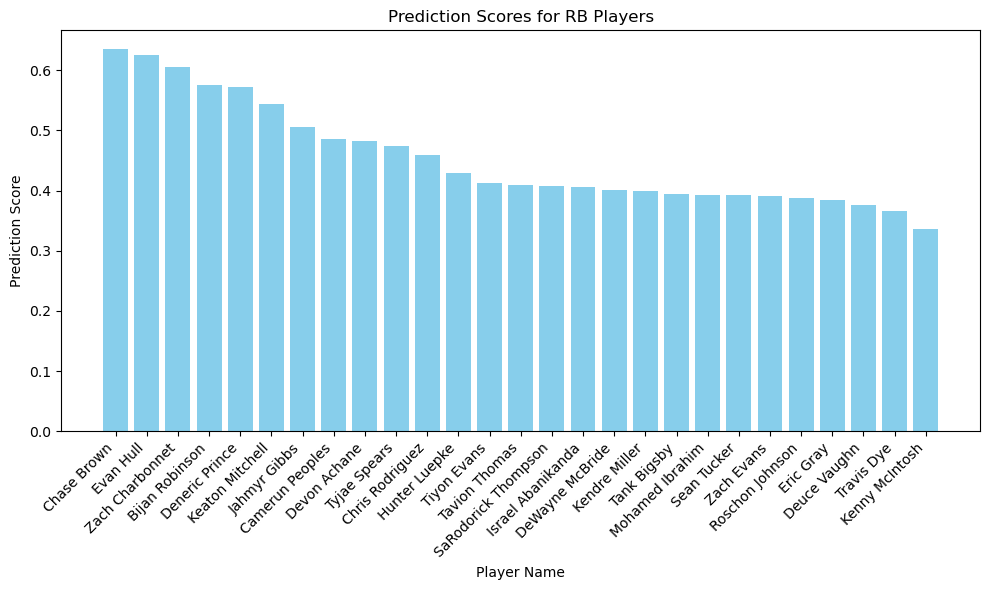

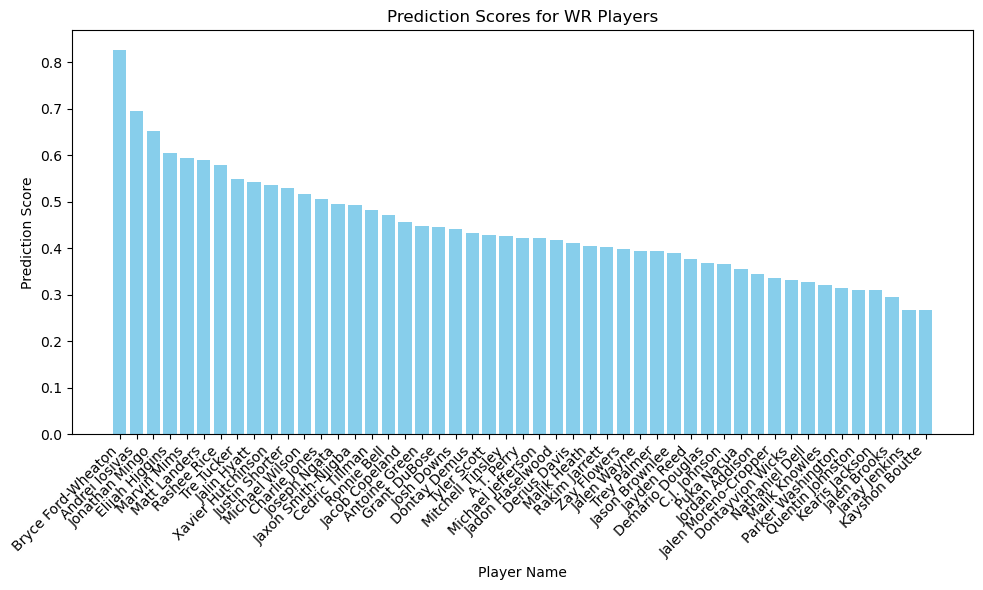

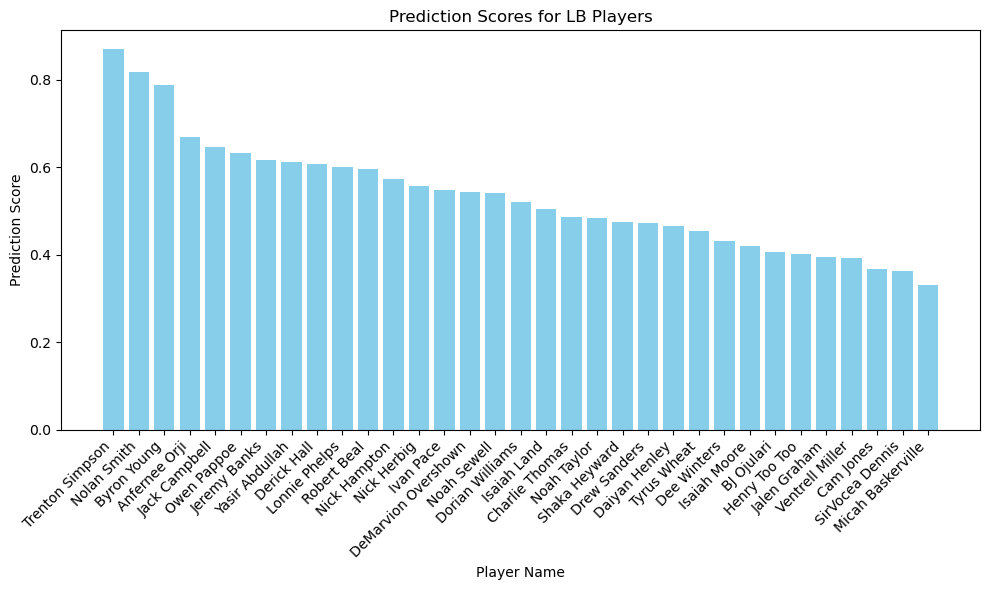

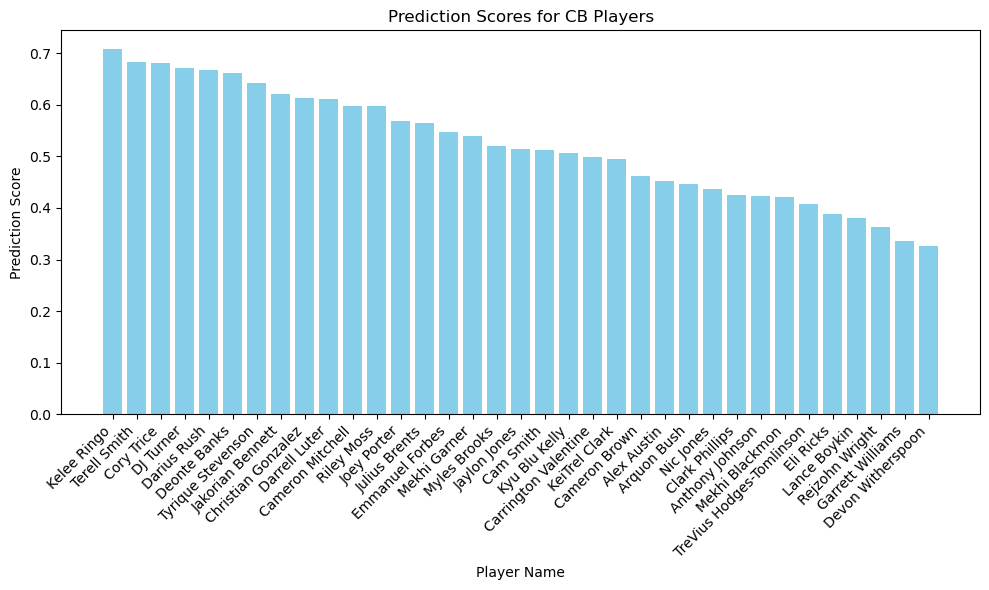

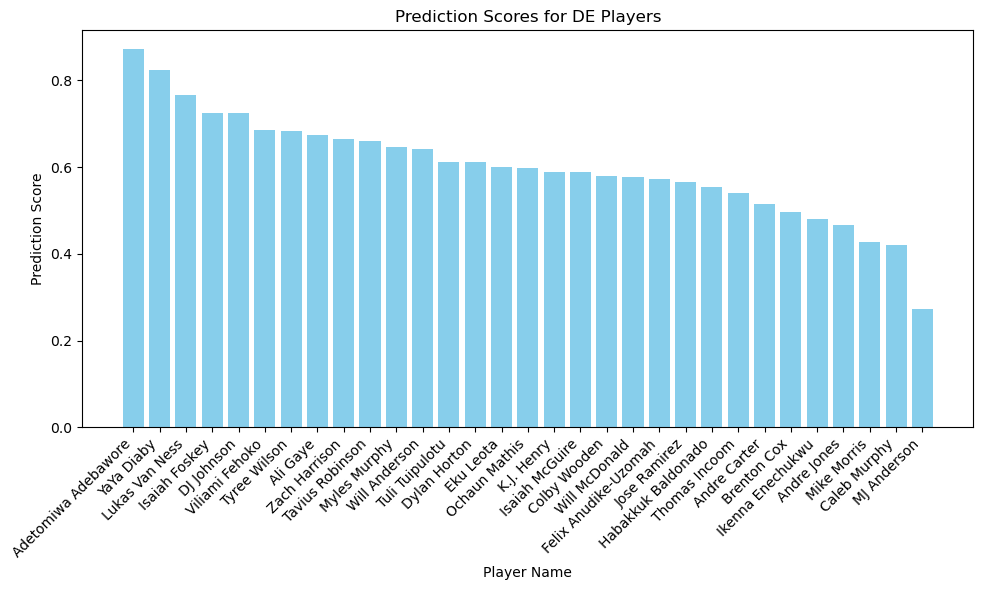

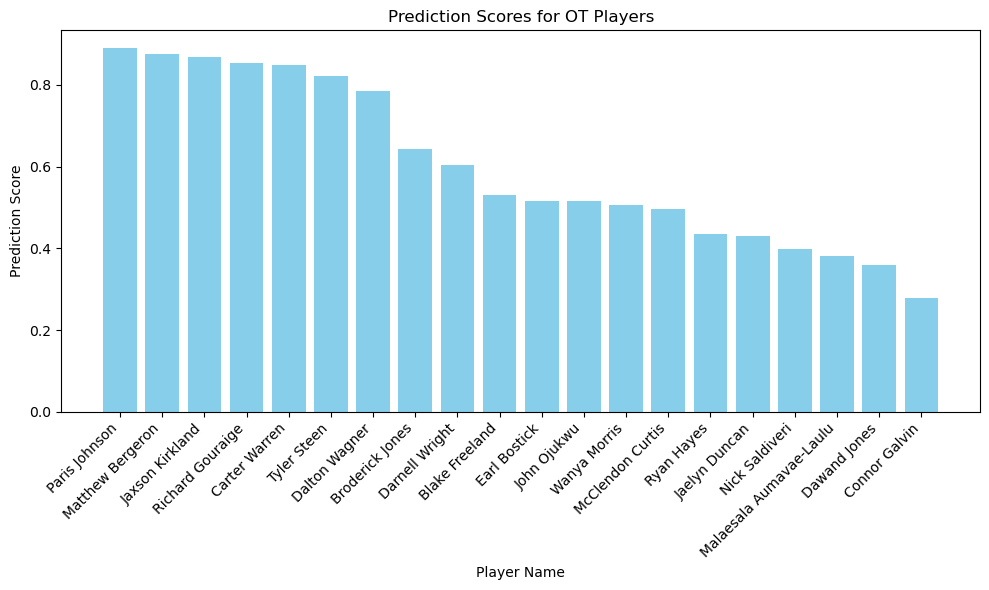

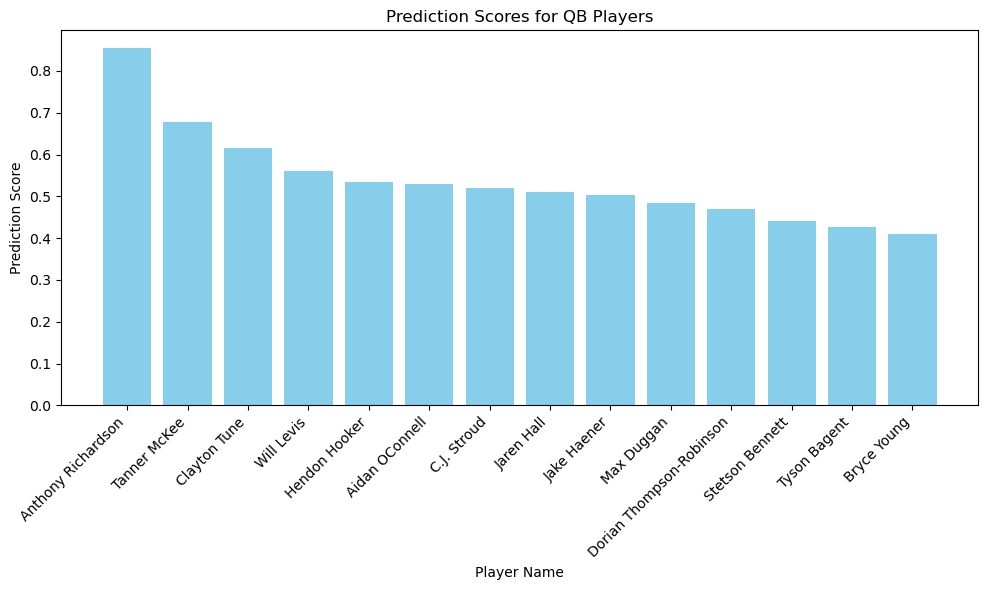

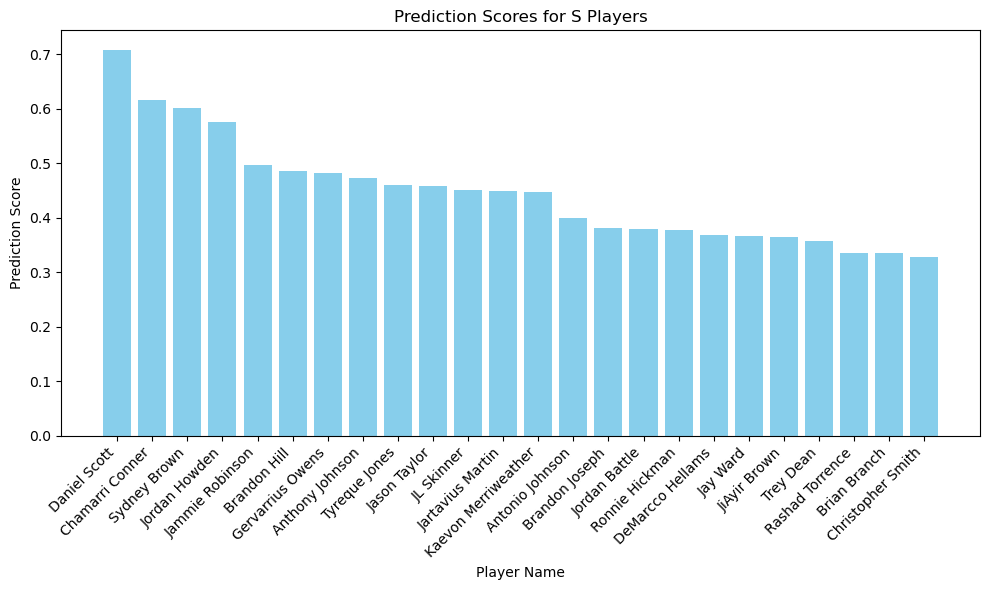

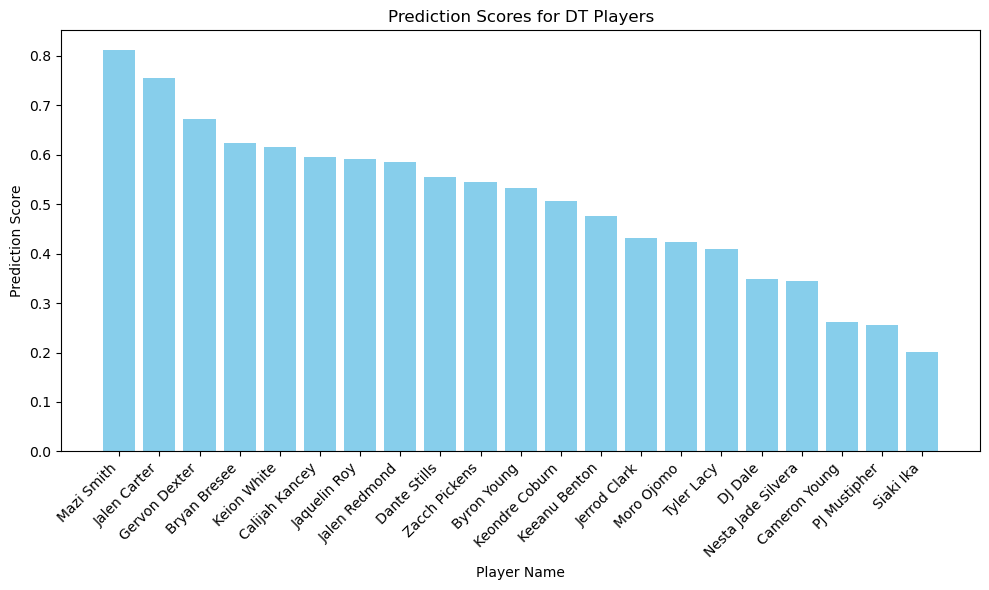

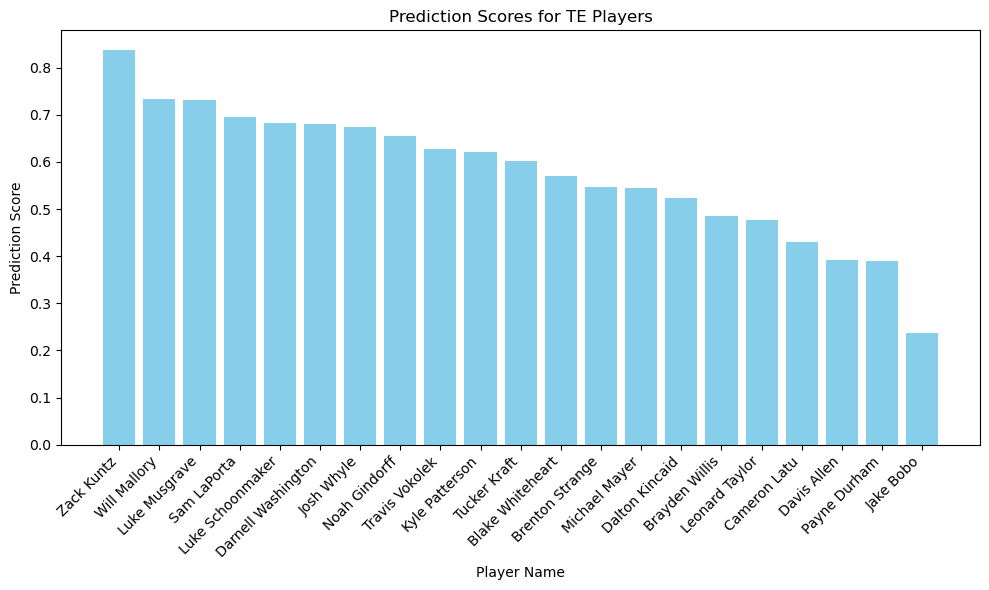

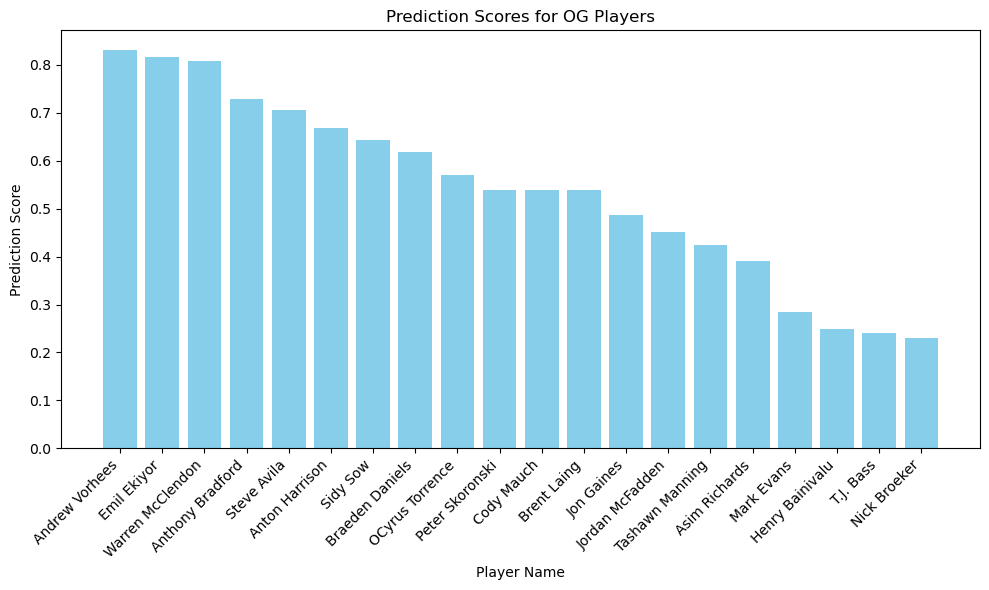

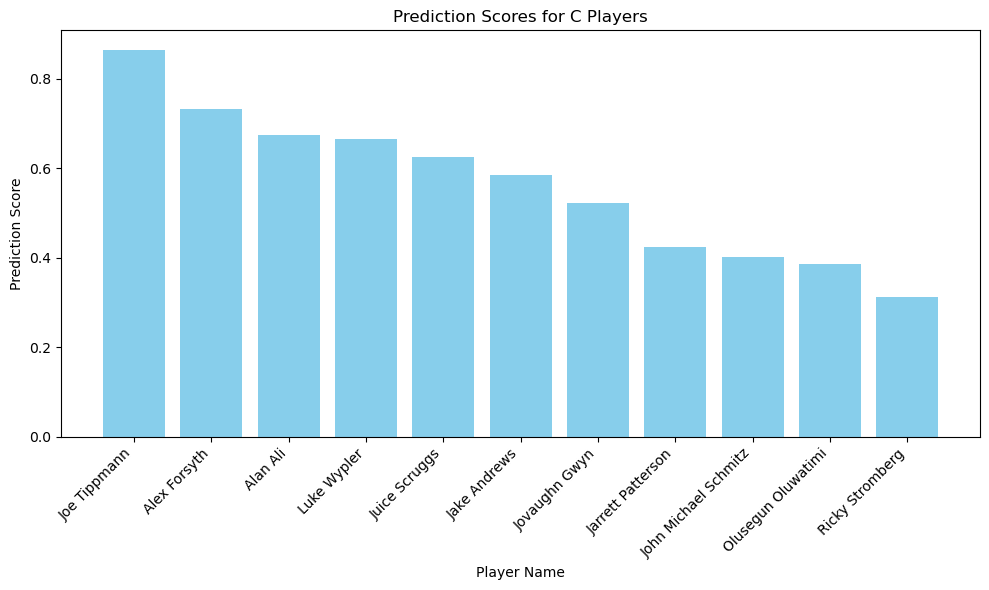

In [28]:
for position in player_POS:
    position_data = combine2023_predictions[combine2023_predictions['POS'] == position]
    
    plt.figure(figsize=(10, 6))
    plt.bar(position_data['Name'], position_data['Prediction Scores'], color='skyblue')
    plt.xlabel('Player Name')
    plt.ylabel('Prediction Score')
    plt.title(f'Prediction Scores for {position} Players')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    
    # Show the plot for this position
    plt.show()